<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/Project_5(AI%20Echo%20-%20Sentiment%20Analysis)/notebook/Model_training_with_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

* Packages for Text preprocessing

In [99]:
# Packages for Data Export
import pandas as pd
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

* Packages for Text cleaning

In [100]:
# Importing packages for Text cleaning
!pip install emoji #installing emojis packages

In [101]:
import re #importing regular expression
import emoji #importing emojis packages

* Importing packages for Tokenization

In [102]:
!pip install nltk

In [103]:
import nltk # Importing needed packages for tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [104]:
from nltk.tokenize import word_tokenize # importing packages for word tekenization

* Importing packages for Normalization

In [105]:
!pip install contractions

In [106]:
import contractions # Finding the root words

* Importing packages for Lemetization & Stop words

In [107]:
nltk.download('wordnet') # Download the WordNet corpus for lemmatization
nltk.download('omw-1.4') # Download the Open Multilingual WordNet corpus for lemmatization
nltk.download('stopwords') # Download the stopwords corpus

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
from nltk.stem import WordNetLemmatizer # Import the WordNetLemmatizer for lemmatization
from nltk.corpus import stopwords # Import the stopwords corpus

* Importing packages for Vectorization

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer # Doing TF-IDF

# Exporting the data



```
Existing data not suitable for model building, So here i'm going to traning a data with new dataset from Kaggle
```



In [110]:
# Replace the URL with your raw GitHub CSV link
url = 'https://raw.githubusercontent.com/Infant-Joshva/Data-Science-learning-path/refs/heads/main/Project_5(AI%20Echo%20-%20Sentiment%20Analysis)/dataset/New%20Dataset%20from%20Kaggle/ChatGPT_Reviews.csv'

# Load the CSV into a DataFrame
sentiment_df = pd.read_csv(url,  sep=',')

# Check the first few rows
sentiment_df.head()


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,8/23/2024 19:30
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,8/23/2024 19:28
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,8/23/2024 19:22
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,8/23/2024 19:20
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,8/23/2024 19:20


# Preprocessing the data

## Delete the unwanted columns

In [111]:
sentiment_df.drop(['Review Id','Ratings','Review Date'], axis=1, inplace=True)
sentiment_df.head(10)

,Review
0,good
1,good
2,nice app
3,"nice, ig"
4,"this is a great app, the bot is so accurate to..."
5,so nice app
6,"just love this app, or guy"
7,great app
8,Very impressive
9,helps with coding a lot this ai is great for e...


### Handling null values

In [112]:
sentiment_df.isnull().sum()

,0
Review,6


In [113]:
sentiment_df.dropna(inplace=True)

In [114]:
sentiment_df.isnull().sum()

,0
Review,0


### Deleting duplicate values

In [115]:
sentiment_df.duplicated().sum()

np.int64(71230)

In [116]:
sentiment_df.drop_duplicates(inplace=True)

In [117]:
sentiment_df.duplicated().sum()

np.int64(0)

In [118]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125491 entries, 0 to 196726
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  125491 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


# Text cleaning - (Functions)

## Function for Text preprocessing

In [119]:
#Function for lower case
def lowercase(text):
  return text.lower()

#remove url
def remove_urls(text):
  urls_pattern=re.compile(r'https?://\S+|www\.\S+')
  return urls_pattern.sub(r'',text)

# remove Mail
def remove_mail(text):
  mail_pattern=re.compile(r'\S+@\S+')
  return mail_pattern.sub(r'',text)

# remove HTML tags
def remove_html(text):
  html_pattern=re.compile('<.*?>')
  return html_pattern.sub(r'',text)

# remove punctuations
def remove_punctuations(text):
  punc_pattern=re.compile(r'[^\w\s]')
  return punc_pattern.sub(r'',text)

# remove numbers and number with text
def remove_numbers(text):
  text=re.sub(r'[A-Za-z]+\d+','',text)
  text=re.sub(r'\d+\s*[A-Za-z]+','',text)
  text=re.sub(r'\d+','',text)
  return text

# remove emoji
def remove_emoji(text):
  return emoji.replace_emoji(text,replace='')

# remove whitespace
def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

In [120]:
# combining all function as a single funcation
def text_cleaning(text):
  text=lowercase(text)
  text=remove_urls(text)
  text=remove_mail(text)
  text=remove_html(text)
  text=remove_punctuations(text)
  text=remove_numbers(text)
  text=remove_emoji(text)
  text=remove_whitespace(text)
  return text

## Tokenization

In [121]:
def tokenize(text):
  return word_tokenize(text)

## Normalization

In [122]:
def expand_contractions(text):
  return contractions.fix(text)

## Lemetization & Stop words

In [123]:
# Lematize and stops words

stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def lemmatizer_stopwords(text):
  return [lemmatizer.lemmatize(word) for word in text if word not in stop_words]

# Applying the written function

## Text cleaning

In [124]:
sentiment_df.head()

,Review
0,good
2,nice app
3,"nice, ig"
4,"this is a great app, the bot is so accurate to..."
5,so nice app


In [125]:
sentiment_df.columns

Index(['Review'], dtype='object')

In [126]:
# def text_cleaning(text)
sentiment_df['cleaned_review'] = sentiment_df['Review'].apply(text_cleaning)
sentiment_df

,Review,cleaned_review
0,good,good
2,nice app,nice app
3,"nice, ig",nice ig
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...
5,so nice app,so nice app
...,...,...
196722,Update 2023,update
196723,its grear,its grear
196724,Funtastic App,funtastic app
196725,hi all,hi all


## Normalization

In [127]:
sentiment_df['expanded_review'] = sentiment_df['cleaned_review'].apply(expand_contractions)
sentiment_df.head()

,Review,cleaned_review,expanded_review
0,good,good,good
2,nice app,nice app,nice app
3,"nice, ig",nice ig,nice ig
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...,this is a great app the bot is so accurate to ...
5,so nice app,so nice app,so nice app


## Tokenize

In [128]:
sentiment_df['tokenized_review'] = sentiment_df['expanded_review'].apply(tokenize)
sentiment_df.head()

,Review,cleaned_review,expanded_review,tokenized_review
0,good,good,good,[good]
2,nice app,nice app,nice app,"[nice, app]"
3,"nice, ig",nice ig,nice ig,"[nice, ig]"
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...,this is a great app the bot is so accurate to ...,"[this, is, a, great, app, the, bot, is, so, ac..."
5,so nice app,so nice app,so nice app,"[so, nice, app]"


## Lemmatizer and Stopwords

In [130]:
sentiment_df['lemmatizer_stopwords_text']=sentiment_df['tokenized_review'].apply(lemmatizer_stopwords)
sentiment_df.head()

,Review,cleaned_review,expanded_review,tokenized_review,lemmatizer_stopwords_text
0,good,good,good,[good],[good]
2,nice app,nice app,nice app,"[nice, app]","[nice, app]"
3,"nice, ig",nice ig,nice ig,"[nice, ig]","[nice, ig]"
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...,this is a great app the bot is so accurate to ...,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, give, ti..."
5,so nice app,so nice app,so nice app,"[so, nice, app]","[nice, app]"


## Final fully cleaned text

In [131]:
sentiment_df['Final_cleaned_review'] = sentiment_df['lemmatizer_stopwords_text'].apply(lambda x: ' '.join(x))
sentiment_df.head()

,Review,cleaned_review,expanded_review,tokenized_review,lemmatizer_stopwords_text,Final_cleaned_review
0,good,good,good,[good],[good],good
2,nice app,nice app,nice app,"[nice, app]","[nice, app]",nice app
3,"nice, ig",nice ig,nice ig,"[nice, ig]","[nice, ig]",nice ig
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...,this is a great app the bot is so accurate to ...,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, give, ti...",great app bot accurate anything give tip gamin...
5,so nice app,so nice app,so nice app,"[so, nice, app]","[nice, app]",nice app


In [132]:
sentiment_df.drop(columns=['Review','cleaned_review','expanded_review','tokenized_review','lemmatizer_stopwords_text'],inplace=True)
sentiment_df.head()

,Final_cleaned_review
0,good
2,nice app
3,nice ig
4,great app bot accurate anything give tip gamin...
5,nice app


# Review mapping to Positive, Neutral or Negative

## Sentiment mapping with Textblob

In [142]:
from textblob import TextBlob

In [143]:
def sentiment_mapping(text, threshold=0.1):
    from textblob import TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity

    # 1. Check for Positive sentiment
    if sentiment > threshold:
        return 'Positive'

    # 2. Check for Negative sentiment
    elif sentiment < -threshold:
        return 'Negative'

    # 3. All remaining scores (between -threshold and +threshold) are Neutral
    else:
        return 'Neutral'

In [144]:
sentiment_df['sentiment']=sentiment_df['Final_cleaned_review'].apply(sentiment_mapping)
sentiment_df.head()

,Final_cleaned_review,detected_language,sentiment
0,great app bot accurate anything give tip gamin...,en,Positive
1,great app,en,NaN
2,help coding lot ai great everyone,en,Positive
3,happy chatgpt answer question ask stop midway ...,en,Positive
4,used good app keep saying error occured try su...,en,Positive


In [145]:
sentiment_df['sentiment'].value_counts()

,count
sentiment,
Positive,30951
Neutral,14671
Negative,1841


In [146]:
sentiment_df.columns

Index(['Final_cleaned_review', 'detected_language', 'sentiment'], dtype='object')

In [147]:
sentiment_df.isnull().sum()

,0
Final_cleaned_review,0
detected_language,0
sentiment,27822


In [148]:
sentiment_df.dropna(inplace=True)

In [149]:
sentiment_df.isnull().sum()

,0
Final_cleaned_review,0
detected_language,0
sentiment,0


In [150]:
sentiment_df.duplicated().sum()

np.int64(3340)

In [151]:
sentiment_df.drop_duplicates(inplace=True)

In [59]:
sentiment_df.duplicated().sum()

np.int64(0)

# Extract Languages

In [133]:
!pip install langdetect

In [134]:
from langdetect import detect, DetectorFactory

In [135]:
# Set a seed to enforce consistent results, as langdetect can be non-deterministic
DetectorFactory.seed = 0

def get_language(text):
    try:
        return detect(str(text))
    except:
        return 'error'

In [136]:
sentiment_df['detected_language'] = sentiment_df['Final_cleaned_review'].apply(get_language)

In [137]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125491 entries, 0 to 196726
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Final_cleaned_review  125491 non-null  object
 1   detected_language     125491 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB


In [138]:
# Filter the DataFrame to keep only English reviews (ISO 639-1 code for English is 'en')
english_reviews_df = sentiment_df[sentiment_df['detected_language'] == 'en'].copy()

In [139]:
print(f"Total reviews: {len(sentiment_df)}")
print(f"English reviews: {len(english_reviews_df)}")

Total reviews: 125491
English reviews: 75285


In [141]:
english_reviews_df.reset_index(drop=True, inplace=True)
english_reviews_df.head()

,Final_cleaned_review,detected_language
0,great app bot accurate anything give tip gamin...,en
1,great app,en
2,help coding lot ai great everyone,en
3,happy chatgpt answer question ask stop midway ...,en
4,used good app keep saying error occured try su...,en


# Balancing the data to minority class

In [152]:
english_reviews_df['sentiment'].value_counts()

,count
sentiment,
Positive,28549
Neutral,13775
Negative,1799


In [153]:
english_reviews_df.columns

Index(['Final_cleaned_review', 'detected_language', 'sentiment'], dtype='object')

In [154]:
category_counts = english_reviews_df['sentiment'].value_counts()
min_count = category_counts.min()

print(f"Counts per category:\n{category_counts}")
print(f"The minimum count is: {min_count}")

Counts per category:
sentiment
Positive    28549
Neutral     13775
Negative     1799
Name: count, dtype: int64
The minimum count is: 1799


In [155]:
english_reviews_df['sentiment'].value_counts()

,count
sentiment,
Positive,28549
Neutral,13775
Negative,1799


In [156]:
balanced_samples = []

for sentiment in english_reviews_df['sentiment'].unique():
    subset = english_reviews_df[english_reviews_df['sentiment'] == sentiment]
    # Randomly sample 'min_count' rows from this subset
    sampled_subset = subset.sample(n=min_count, random_state=42)

    # Add the sampled subset to the list
    balanced_samples.append(sampled_subset)

# Concatenate all the sampled subsets into one balanced DataFrame
balanced_en_senti_df = pd.concat(balanced_samples)

# Verify the new distribution
print("\nNew balanced counts:")
print(balanced_en_senti_df['sentiment'].value_counts())


New balanced counts:
sentiment
Positive    1799
Neutral     1799
Negative    1799
Name: count, dtype: int64


In [157]:
balanced_en_senti_df.reset_index(drop=True, inplace=True)
balanced_en_senti_df

,Final_cleaned_review,detected_language,sentiment
0,sometimes provide correct info,en,Positive
1,great still need copy button code edit questio...,en,Positive
2,instrumental resume writing professional lette...,en,Positive
3,would recommend thousand helpfull thank chatgpt,en,Positive
4,chatgpt help friend jano loss weight keep tell...,en,Positive
...,...,...,...
5392,best people,en,Negative
5393,helpful sometime sucksgiving wrong answer,en,Negative
5394,easy use helpful,en,Negative
5395,lovely limitless infinite,en,Negative


In [158]:
balanced_en_senti_df.value_counts('sentiment')

,count
sentiment,
Negative,1799
Neutral,1799
Positive,1799


In [159]:
balanced_en_senti_df.columns

Index(['Final_cleaned_review', 'detected_language', 'sentiment'], dtype='object')

# Model Building

In [160]:
balanced_en_senti_df

,Final_cleaned_review,detected_language,sentiment
0,sometimes provide correct info,en,Positive
1,great still need copy button code edit questio...,en,Positive
2,instrumental resume writing professional lette...,en,Positive
3,would recommend thousand helpfull thank chatgpt,en,Positive
4,chatgpt help friend jano loss weight keep tell...,en,Positive
...,...,...,...
5392,best people,en,Negative
5393,helpful sometime sucksgiving wrong answer,en,Negative
5394,easy use helpful,en,Negative
5395,lovely limitless infinite,en,Negative


In [161]:
x=balanced_en_senti_df['Final_cleaned_review']
y=balanced_en_senti_df['sentiment']

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4317,), (1080,), (4317,), (1080,))

## Importing packages for Model building

In [163]:
!pip install imbalanced-learn

In [164]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [165]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline.fit(x_train,y_train)

y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.72      0.75      0.73      1450
     Neutral       0.71      0.74      0.73      1458
    Positive       0.76      0.69      0.72      1409

    accuracy                           0.73      4317
   macro avg       0.73      0.73      0.73      4317
weighted avg       0.73      0.73      0.73      4317

              precision    recall  f1-score   support

    Negative       0.33      0.37      0.35       349
     Neutral       0.32      0.35      0.34       341
    Positive       0.42      0.33      0.37       390

    accuracy                           0.35      1080
   macro avg       0.36      0.35      0.35      1080
weighted avg       0.36      0.35      0.35      1080



> Model is overfit due to unwanted repetive words

In [166]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

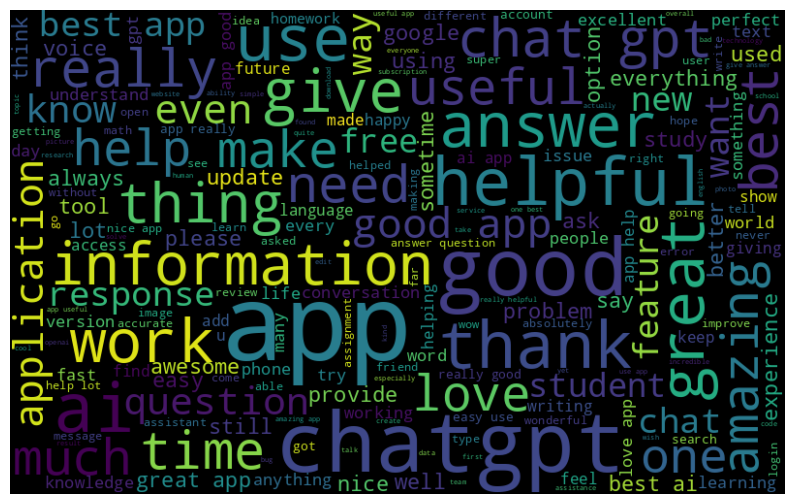

In [167]:
all_words = ' '.join([text for text in balanced_en_senti_df['Final_cleaned_review']])
wordcolud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [168]:
freq=pd.Series(' '.join(balanced_en_senti_df['Final_cleaned_review']).split()).value_counts()
freq

,count
app,2179
good,891
chatgpt,685
ai,633
best,620
...,...
friendthanks,1
adorable,1
appthank,1
existnot,1


In [169]:
freq.head(60)

,count
app,2179
good,891
chatgpt,685
ai,633
best,620
answer,514
like,486
really,479
great,461
help,453


In [170]:
freq.describe()

,count
count,5977.000000
mean,8.520328
std,44.111096
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,2179.000000


In [171]:
freq_50 = freq[freq<=50]
freq_50

,count
english,50
data,50
technology,50
cool,49
create,49
...,...
friendthanks,1
adorable,1
appthank,1
existnot,1


In [172]:
freq_100 = freq[freq<=100]
freq_100

,count
option,100
wrong,98
learning,97
text,97
image,97
...,...
friendthanks,1
adorable,1
appthank,1
existnot,1


In [173]:
freq_300 = freq[freq<=300]
freq_300

,count
gpt,299
thing,276
need,275
amazing,265
much,248
...,...
friendthanks,1
adorable,1
appthank,1
existnot,1


In [174]:
freq_400 = freq[freq<=400]
freq_400

,count
give,397
question,349
work,331
love,317
time,308
...,...
friendthanks,1
adorable,1
appthank,1
existnot,1


In [175]:
freq_500 = freq[freq<=500]
freq_500

,count
like,486
really,479
great,461
help,453
use,447
...,...
friendthanks,1
adorable,1
appthank,1
existnot,1


In [176]:
balanced_en_senti_df['Final_text_new']=balanced_en_senti_df['Final_cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in freq_50]))
balanced_en_senti_df['Final_text_new']

,Final_text_new
0,sometimes provide correct
1,great still need question also like website like
2,writing question
3,would recommend thank chatgpt
4,chatgpt help friend keep say friend
...,...
5392,best people
5393,helpful wrong answer
5394,easy use helpful
5395,


In [177]:
balanced_en_senti_df['Final_text_new'].isnull().sum()

np.int64(0)

In [178]:
x=balanced_en_senti_df['Final_text_new']
y=balanced_en_senti_df['sentiment']

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4317,), (1080,), (4317,), (1080,))

In [180]:
nb_pipeline_2=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline_2.fit(x_train,y_train)

y_train_pred=nb_pipeline_2.predict(x_train)
y_test_pred=nb_pipeline_2.predict(x_test)

print(classification_report(y_train,y_train_pred))
print('-'*70)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.44      0.45      0.44      1450
     Neutral       0.41      0.49      0.45      1458
    Positive       0.46      0.36      0.41      1409

    accuracy                           0.43      4317
   macro avg       0.44      0.43      0.43      4317
weighted avg       0.44      0.43      0.43      4317

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.32      0.36      0.34       349
     Neutral       0.34      0.40      0.37       341
    Positive       0.39      0.29      0.34       390

    accuracy                           0.35      1080
   macro avg       0.35      0.35      0.35      1080
weighted avg       0.35      0.35      0.35      1080



In [181]:
from sklearn.model_selection import GridSearchCV

nb_pipeline_2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams only vs. Unigrams and Bigrams
    'tfidf__max_features': [10000, 20000, None], # Max features limit
    'nb__alpha': [0.1, 0.5, 1.0, 5.0]  # Smoothing parameter
}

grid_search = GridSearchCV(nb_pipeline_2, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# The best model:
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'nb__alpha': 5.0, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 1)}


In [182]:
nb_pipeline_bigrams = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 1))),
    ('nb', MultinomialNB(alpha=1.0))
])

nb_pipeline_bigrams.fit(x_train,y_train)

y_train_pred=nb_pipeline_bigrams.predict(x_train)
y_test_pred=nb_pipeline_bigrams.predict(x_test)

print(classification_report(y_train,y_train_pred))
print('-'*70)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.44      0.45      0.44      1450
     Neutral       0.41      0.49      0.45      1458
    Positive       0.46      0.36      0.41      1409

    accuracy                           0.43      4317
   macro avg       0.44      0.43      0.43      4317
weighted avg       0.44      0.43      0.43      4317

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.32      0.36      0.34       349
     Neutral       0.34      0.40      0.37       341
    Positive       0.39      0.29      0.34       390

    accuracy                           0.35      1080
   macro avg       0.35      0.35      0.35      1080
weighted avg       0.35      0.35      0.35      1080



In [183]:
nb_pipeline_bigrams_2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('nb', MultinomialNB(alpha=1.0))
])

nb_pipeline_bigrams_2.fit(x_train,y_train)

y_train_pred=nb_pipeline_bigrams_2.predict(x_train)
y_test_pred=nb_pipeline_bigrams_2.predict(x_test)

print(classification_report(y_train,y_train_pred))
print('-'*70)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.79      0.80      1450
     Neutral       0.76      0.87      0.81      1458
    Positive       0.86      0.76      0.81      1409

    accuracy                           0.81      4317
   macro avg       0.81      0.81      0.81      4317
weighted avg       0.81      0.81      0.81      4317

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.32      0.35      0.33       349
     Neutral       0.32      0.37      0.34       341
    Positive       0.37      0.29      0.32       390

    accuracy                           0.33      1080
   macro avg       0.34      0.34      0.33      1080
weighted avg       0.34      0.33      0.33      1080



In [184]:
#SVM

from sklearn.svm import SVC

In [185]:
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 1))),
    ('svm', SVC(class_weight='balanced'))
])

svm_pipeline.fit(x_train, y_train)

y_train_pred = svm_pipeline.predict(x_train)
y_test_pred = svm_pipeline.predict(x_test)

print(classification_report(y_train, y_train_pred))
print('-' * 70)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.72      0.74      0.73      1450
     Neutral       0.72      0.74      0.73      1458
    Positive       0.76      0.71      0.73      1409

    accuracy                           0.73      4317
   macro avg       0.73      0.73      0.73      4317
weighted avg       0.73      0.73      0.73      4317

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.32      0.35      0.33       349
     Neutral       0.33      0.35      0.34       341
    Positive       0.35      0.31      0.33       390

    accuracy                           0.33      1080
   macro avg       0.33      0.33      0.33      1080
weighted avg       0.33      0.33      0.33      1080



In [186]:
# Define the custom weights dictionary
custom_weights = {
    'Negative': 1.5,  # Increased weight for higher penalty on misclassification
    'Neutral': 1.0,   # Baseline weight
    'Positive': 1.0   # Baseline weight
}

svm_pipeline_2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 1))),
    ('svm', SVC(class_weight=custom_weights))
])

svm_pipeline_2.fit(x_train, y_train)

y_train_pred = svm_pipeline_2.predict(x_train)
y_test_pred = svm_pipeline_2.predict(x_test)

print(classification_report(y_train, y_train_pred))
print('-' * 70)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.52      0.98      0.68      1450
     Neutral       0.89      0.49      0.63      1458
    Positive       0.89      0.51      0.65      1409

    accuracy                           0.66      4317
   macro avg       0.77      0.66      0.65      4317
weighted avg       0.77      0.66      0.65      4317

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.32      0.77      0.45       349
     Neutral       0.30      0.10      0.15       341
    Positive       0.40      0.14      0.21       390

    accuracy                           0.33      1080
   macro avg       0.34      0.34      0.27      1080
weighted avg       0.34      0.33      0.27      1080

